In [1]:
%reset -f

import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import statsmodels.api   as sm
import scipy

# Q1. MBA

## load data

In [2]:
df1 = pd.read_csv("mba3.csv")
df1.head()

,salary,testsc,wam,libsize,rank
0,131400,10.33,3.15,216,128
1,133098,10.67,3.50,256,104
2,132870,10.33,3.25,424,34
3,135000,10.47,3.20,329,49
4,133606,10.80,3.38,332,95


In [3]:
df1.tail()

,salary,testsc,wam,libsize,rank
245,131700,10.73,3.40,311,98
246,130410,10.33,3.16,220,124
247,130150,10.13,3.12,230,157
248,131300,10.33,3.12,230,145
249,133200,10.67,3.66,157,91


## #1(a). summary statistics

In [4]:
df1.describe()

,salary,testsc,wam,libsize,rank
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,139751.952000,10.586880,3.314160,354.928000,79.540000
std,12976.657803,0.294749,0.197928,211.844213,48.488897
min,124900.000000,9.670000,2.730000,124.000000,1.000000
25%,130150.000000,10.330000,3.200000,230.250000,38.000000
50%,134400.000000,10.530000,3.300000,310.500000,79.000000
75%,142300.000000,10.800000,3.420000,409.750000,122.750000
max,179000.000000,11.400000,3.820000,1745.000000,174.000000


## #1(c). regression

In [5]:
df1['loglibsize'] = np.log(df1['libsize'])
df1['logsalary'] = np.log(df1['salary'])

In [6]:
df1.describe()

,salary,testsc,wam,libsize,rank,loglibsize,logsalary
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,139751.952000,10.586880,3.314160,354.928000,79.540000,5.762255,11.843622
std,12976.657803,0.294749,0.197928,211.844213,48.488897,0.436223,0.088103
min,124900.000000,9.670000,2.730000,124.000000,1.000000,4.820282,11.735269
25%,130150.000000,10.330000,3.200000,230.250000,38.000000,5.439164,11.776443
50%,134400.000000,10.530000,3.300000,310.500000,79.000000,5.738183,11.808576
75%,142300.000000,10.800000,3.420000,409.750000,122.750000,6.015547,11.865693
max,179000.000000,11.400000,3.820000,1745.000000,174.000000,7.464510,12.095141


In [7]:
X = df1[['testsc', 'wam', 'rank', 'loglibsize']]
X = sm.add_constant(X)
Y = df1[['logsalary']]

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
reg1 = sm.OLS(Y, X)

result1 = reg1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:              logsalary   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     234.3
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           1.84e-82
Time:                        21:36:07   Log-Likelihood:                 449.80
No. Observations:                 250   AIC:                            -889.6
Df Residuals:                     245   BIC:                            -872.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9997      0.143     76.877      0.0

## #1(d). t-test on $$H_0 : \beta_{\mathrm{rank}}=0;$$ $$H_1 : \beta_{\mathrm{rank}} \neq 0;$$

In [9]:
print(result1.t_test(["rank = 0"]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0009      9e-05    -10.402      0.000      -0.001      -0.001



## #1(d). t-test on $$H_0 : \beta_{\mathrm{rank}} \geqslant 0;$$ $$H_1 : \beta_{\mathrm{rank}} < 0;$$

In [23]:
hyp_val = 0

t_val = (result1.params[3] - hyp_val)/result1.bse[3]

print("p value is ", scipy.stats.t.pdf(t_val, result1.df_resid))

p value is  1.1521882200941008e-20


## #1(e). F test on $$H_0 : \beta_{\mathrm{wam}}=\beta_{\mathrm{testsc}}=0;$$ $$H_1 : \mbox{ at least one of } \beta_{\mathrm{wam}} \mbox{ and }\beta_{\mathrm{testsc}} \mbox{ is not } 0.$$ 

In [24]:
print(result1.f_test("testsc = wam = 0"))

<F test: F=array([[16.67369352]]), p=1.6252478868143338e-07, df_denom=245, df_num=2>


## #1(f). F test on $$H_0 : \beta_{\mathrm{wam}}=\beta_{\mathrm{testsc}};$$ $$H_1 : \beta_{\mathrm{wam}} \neq \beta_{\mathrm{testsc}}.$$

In [25]:
print(result1.t_test(["testsc = wam"]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0021      0.036      0.058      0.954      -0.069       0.073


# Q2 NBA 

## #2(a). OLS

In [26]:
df2 = pd.read_csv("nbasal.csv")
df2.head()

,marr,wage,exper,age,coll,games,minutes,guard,forward,center,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
0,1,1002.5,4,27,4,77,2867,1,0,0,...,4.5,19.0,0,37.233761,6.910252,1,0,16,729,1
1,1,2030.0,5,28,4,78,2789,1,0,0,...,8.8,28.0,0,35.756409,7.615791,1,1,25,784,1
2,0,650.0,1,25,4,74,1149,0,0,1,...,0.2,19.0,0,15.527030,6.476973,1,0,1,625,0
3,0,2030.0,5,28,4,47,1178,0,1,0,...,1.5,1.0,0,25.063829,7.615791,1,0,25,784,0
4,0,755.0,3,24,4,82,2096,1,0,0,...,2.6,24.0,0,25.560980,6.626718,1,0,9,576,0


In [27]:
X = df2[['exper', 'expersq', 'age', 'coll']]
X = sm.add_constant(X)
Y = df2[['points']]

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
reg2 = sm.OLS(Y, X)

result2 = reg2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     10.85
Date:                Thu, 02 Sep 2021   Prob (F-statistic):           3.69e-08
Time:                        21:42:51   Log-Likelihood:                -838.21
No. Observations:                 269   AIC:                             1686.
Df Residuals:                     264   BIC:                             1704.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2183      6.987      5.041      0.0

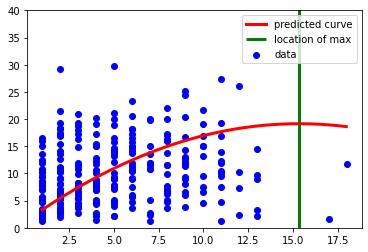

In [50]:
x_val = np.arange(np.min(df2['exper']), np.max(df2['exper']), 0.01)
y_val = result2.params[0] + result2.params[1] * x_val + result2.params[2] * np.square(x_val) + result2.params[3] * np.mean(df2['age']) + result2.params[4] * np.mean(df2['coll'])

x_loc = x_val[np.argmax(y_val)]

fig = plt.figure()

plt.plot(x_val, y_val, color='red', lw=3, label="predicted curve")
plt.vlines(x_loc, -5, 45, color='green', lw=3, label="location of max")
plt.scatter(df2['exper'], df2['points'], color="blue", label="data")

plt.legend()

plt.ylim(0,40)
plt.show()

## #2(d). add a quadratic term

In [33]:
X = df2[['exper', 'expersq', 'age', 'agesq', 'coll']]
X = sm.add_constant(X)
Y = df2[['points']]

In [34]:
reg2 = sm.OLS(Y, X)

result2 = reg2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.925
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           7.61e-08
Time:                        17:20:16   Log-Likelihood:                -837.61
No. Observations:                 269   AIC:                             1687.
Df Residuals:                     263   BIC:                             1709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.5903     35.933      2.048      0.0

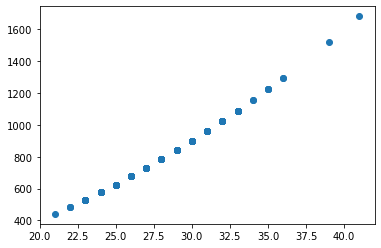

In [36]:
fig = plt.figure()

plt.scatter(df2['age'], df2['agesq'])

plt.show()

## 2(e) OLS of $\log \left( \mathrm{wage} \right)$

In [37]:
X = df2[['points', 'exper', 'expersq', 'age', 'coll']]
X = sm.add_constant(X)
Y = df2[['lwage']]

In [38]:
reg2 = sm.OLS(Y, X)

result2 = reg2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     50.10
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           2.43e-36
Time:                        17:23:09   Log-Likelihood:                -257.23
No. Observations:                 269   AIC:                             526.5
Df Residuals:                     263   BIC:                             548.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7790      0.845      8.019      0.0

## 2(g)

In [39]:
df3 = df2[['lwage', 'points', 'exper', 'expersq', 'age', 'agesq', 'coll', 'marr', 'games', 
           'minutes', 'guard', 'forward','rebounds', 'assists','draft', 'allstar','avgmin',
           'black', 'children','marrblck']]
df3 = df3.dropna(axis=0)

In [40]:
X2 = df3[['points', 'exper', 'expersq', 'age', 'agesq', 'coll', 'marr', 'games', 'minutes', 'guard', 'forward','rebounds', 
        'assists','draft', 'allstar','avgmin','black', 'children','marrblck']]
X2 = sm.add_constant(X2)
Y2 = df3[['lwage']]

In [41]:
reg2 = sm.OLS(Y2, X2)

result2 = reg2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     14.24
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           8.79e-29
Time:                        17:25:23   Log-Likelihood:                -193.11
No. Observations:                 240   AIC:                             426.2
Df Residuals:                     220   BIC:                             495.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3716      4.012      2.834      0.0

## either, you can use the "linear_model" pacakge in sklearn

In [42]:
from sklearn import linear_model

In [43]:
reg = linear_model.LinearRegression()
reg.fit(X2,Y2)

LinearRegression()

In [44]:
reg.coef_

array([[ 0.00000000e+00,  5.26695455e-02,  2.06754602e-01,
        -1.47215066e-02, -4.47643897e-01,  8.77439848e-03,
        -6.27515814e-02,  9.62407100e-02,  3.92734587e-03,
        -2.91256305e-04, -1.77826128e-01, -2.38520650e-02,
         6.77745796e-03,  3.47324902e-02, -1.15119153e-02,
        -2.89986972e-01,  2.92898485e-02,  2.41594028e-01,
         1.67942718e-02, -1.83645466e-01]])

In [45]:
reg.intercept_

array([11.37158814])

In [25]:
!jupyter nbconvert --to html W3_Python.ipynb 

[NbConvertApp] Converting notebook W3_Python.ipynb to html
[NbConvertApp] Writing 623929 bytes to W3_Python.html
